# 8510 Fetch

In [2]:
import skrf.vi.vna.hp
import skrf, time
import tqdm, numpy as np

In [4]:
vna = skrf.vi.vna.hp.HP8510C('TCPIP::ad007-right.jdewerd.com::gpib0,16::INSTR')

In [11]:
%%time
vna.set_frequency_sweep(45e6,50e9,10001)
for i in tqdm.tqdm([0,1,2]):
    net = vna.get_snp_network(ports=(1,))
    net.write_touchstone(filename=f'SEA_85058B/85058B_FM_3654B_FTERM2_8510C_mate1_swp{i}.s1p')

100%|██████████| 3/3 [21:23<00:00, 427.87s/it]

CPU times: user 1.41 s, sys: 324 ms, total: 1.73 s
Wall time: 21min 24s


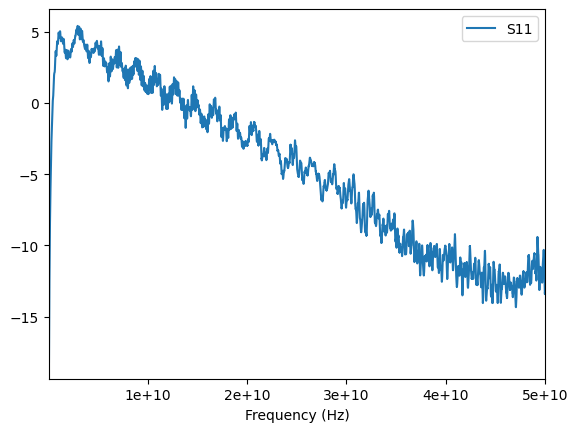

In [29]:
net.plot_s_db()

# FieldFox Fetch

In [118]:
import skrf.vi.vna.keysight
ff = skrf.vi.vna.keysight.FieldFox('TCPIP0::192.168.68.65::inst0::INSTR')
ff.freq_start='300kHz'
ff.freq_stop='50GHz'
ff.npoints=10001
ff.if_bandwidth=1000

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:59<00:00, 59.96s/it]


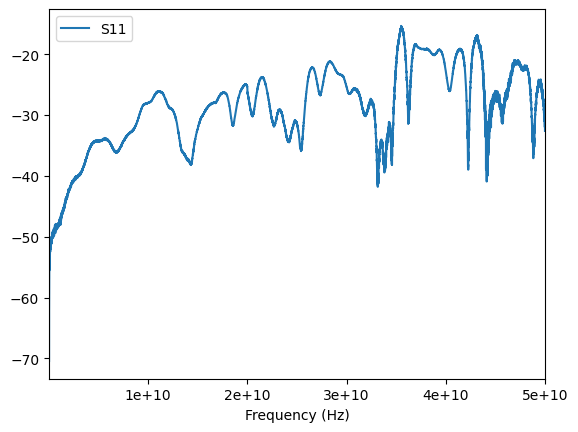

In [179]:
for i in tqdm.tqdm(range(3)):
    net=ff.get_snp_network([1]) # 85058B  3654B  85056A  
    net.write_touchstone(filename=f'SEA_3654B/3654B_FM_3654B_FTERM2_FieldFox_mate1_swp{i}.s1p')
net.plot_s_db()